# Nebular models with higher spectral resolution fitting test 1

Note: Rest Wavelengths: $\lambda_{H\alpha}$ = 6564.610 A. $\lambda_{H\beta}$ = 4862.683 A

Observed Wavelengths: $\lambda_{H\alpha}$ = 6892.841 A. $\lambda_{H\beta}$ = 5105.817 A

In [1]:
import bagpipes as pipes
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import simps
from numpy import trapz

goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")

## $A_{V}$ = 0.1 with nebular component (no masking)

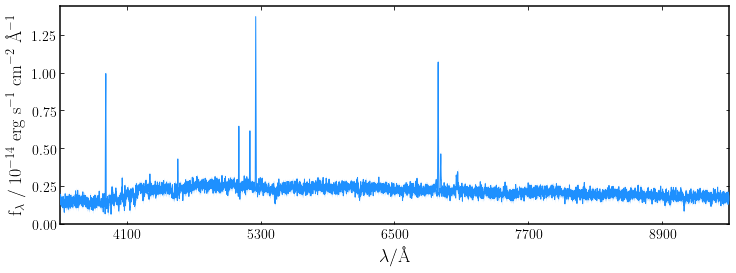

In [2]:
#loads the data file where noise has been added to the model
def load_spec(ID):
    """ Loads VANDELS spectroscopic data from file. """

    spec = np.loadtxt("fluxlines"+ID+".txt",delimiter=',')
    
    return spec

galaxy1 = pipes.galaxy("1b", load_spec, photometry_exists=False)
fig1 = galaxy1.plot()

In [3]:
#loads the fit that has already been run
fit_instructions = {}
fit1 = pipes.fit(galaxy1, fit_instructions, run="Neb1FluxLines")
fit1.fit(verbose=False)


Results loaded from pipes/posterior/Neb1FluxLines/1b.h5

Fitting not performed as results have already been loaded from pipes/posterior/Neb1FluxLines/1b.h5. To start over delete this file or change run.



In [4]:
#Loads posteriors
fit1.posterior.get_advanced_quantities()
fig = fit1.plot_spectrum_posterior(save=True, show=True)

# Find max likelihood model - extract spectrum and photometry
nsamples = fit1.posterior.samples2d.shape[0]
lnlike = np.zeros(nsamples)
for j in range(nsamples):
        lnlike[j] = fit1.fitted_model.lnlike(fit1.posterior.samples2d[j, :])

# input
spectrum = fit1.galaxy.spectrum


# best fit
ind_bestfit = np.argmin(lnlike)
fit1.fitted_model.lnlike(fit1.posterior.samples2d[ind_bestfit, :])

model_bestfit = fit1.fitted_model.model_galaxy
spectrum_bestfit = model_bestfit.spectrum[:, 1]

# median of posterior
med_spec = np.percentile(fit1.posterior.samples["spectrum"], 50, axis=0)




(6800, 7150)

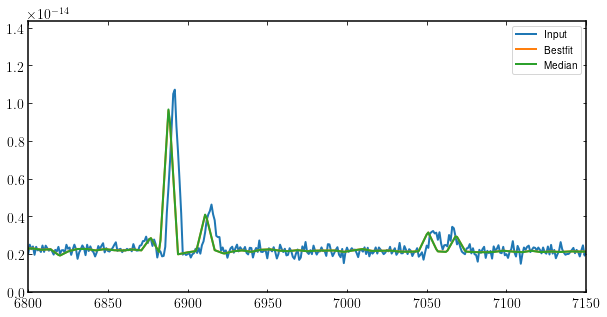

In [9]:
plt.figure(figsize=(10,5))
plt.plot(spectrum[:,0], spectrum[:,1],label="Input")
plt.plot(spectrum[:,0], spectrum_bestfit,label="Bestfit")
plt.plot(spectrum[:,0], med_spec,label="Median")

plt.legend()


plt.xlim(6800,7150)


(6800, 7150)

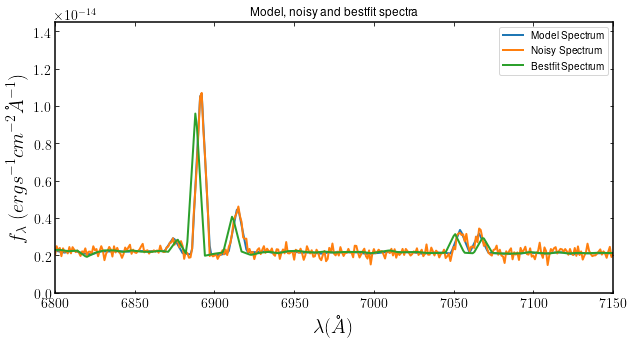

In [10]:
#loads model spectra data from file
spec = np.loadtxt("fluxlines1a.txt",delimiter=',')
#loads noisy spectra data from file
noisespec = np.loadtxt("fluxlines1b.txt",delimiter=',')

#Seperates fluxes and wavelength arrays from file for the model spectrum
fluxes = spec[:,1]
wavelen = spec[:,0]

#Seperates fluxes and wavelength arrays from file for the noisy spectrum
noisefluxes = noisespec[:,1]
noisewavelen = noisespec[:,0]

#Plots the model, noisy and best fit spectra
plt.figure(figsize=(10,5))
plt.title(r"Model, noisy and bestfit spectra")
plt.plot(wavelen, fluxes,label="Model Spectrum")
plt.plot(noisewavelen,noisefluxes,label="Noisy Spectrum")
plt.plot(spectrum[:,0],spectrum_bestfit,label="Bestfit Spectrum")
plt.xlabel("$\lambda (\AA)$",fontsize=20)
plt.ylabel("$f_{\lambda}$ $(erg s^{-1} cm^{-2} \AA^{-1})$",fontsize=20)
plt.legend()
plt.xlim(6800,7150)